**PREDIÇÃO DA PRODUÇÃO DE COBRE (ROM) DOS PROXIMOS ANOS

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

,cobre
data,
1,4.06
2,4.13
3,4.48
4,11.21
5,18.19
6,20.89
7,31.60
8,38.78
9,37.66


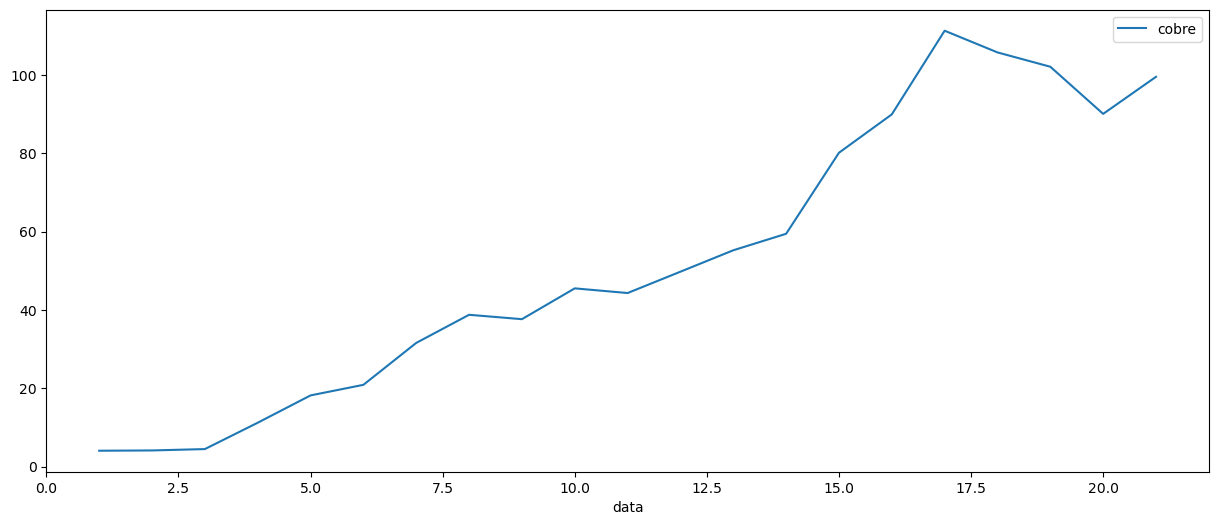

In [2]:
# Caminho do arquivo
caminho_arquivo = r"C:\Users\Eduarda\Downloads\artigo_eduarda_sent\anm_ano.xlsx" #noteempresa
# Carregando a base de dados data_anm
dados_cobre = pd.read_excel(caminho_arquivo, sheet_name='data_cobre')
# Colocando a data como coluna index
dados_datatime_cobre = dados_cobre.set_index('data')
# Vizualiando a producao 
dados_datatime_cobre.plot(figsize=(15,6))
dados_datatime_cobre

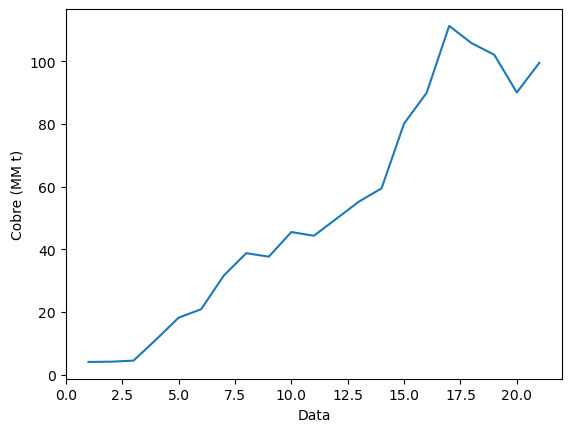

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21]], dtype=int64)

In [3]:
# Definindo x e y 
df_x = dados_datatime_cobre.index
df_y = dados_datatime_cobre['cobre']

df_x = np.reshape(df_x, (-1, 1))

# Visualizando em gráfico de linha
plt.plot(df_x, df_y)
plt.xlabel('Data')
plt.ylabel('Cobre (MM t)')
plt.show()
df_x

In [4]:
# Dividindo treino (80%) teste (30%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=42)
# Reshape X_train
X_train = np.reshape(X_train, (-1, 1))

**METRICA DE AVALIAÇÃO: sMAPE**

In [5]:
# Definindo  funcao sMAPE
# a = valor atual
# f = valor predisto
def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

**DECISION TREE REGRESSOR**

In [6]:
from sklearn.tree import DecisionTreeRegressor

# Treinando o modelo 
regressor_dt = DecisionTreeRegressor()
regressor_dt.fit(X_train, y_train)
y_pred_dt = regressor_dt.predict(X_test)

    
# Avaliando o conjunto de treino
y_train_pred_dt = regressor_dt.predict(X_train)
smape_train_dt = smape(y_train, y_train_pred_dt)  # Calculando o R² no conjunto de treinamento
print('sMAPE (Treinamento): %.3f' % smape_train_dt)   

# Avaliando o conjunto de teste
smape_test_dt = smape(y_test, y_pred_dt)  # Calculando o R² no conjunto de treinamento
print('sMAPE (Teste): %.3f' % smape_test_dt)   


sMAPE (Treinamento): 0.000
sMAPE (Teste): 8.988


In [7]:
result = pd.DataFrame()
result["Real"] = y_test
result["Previsto"] = y_pred_dt
result

,Real,Previsto
data,,
1,4.06,4.48
18,105.80,111.34
16,89.97,80.17
2,4.13,4.48
9,37.66,38.78
6,20.89,18.19
12,49.79,44.34


**CURVAS DE VALIDAÇÃO**

Text(0.5, 1.0, 'Profundidade da Árvore versus sMAPE')

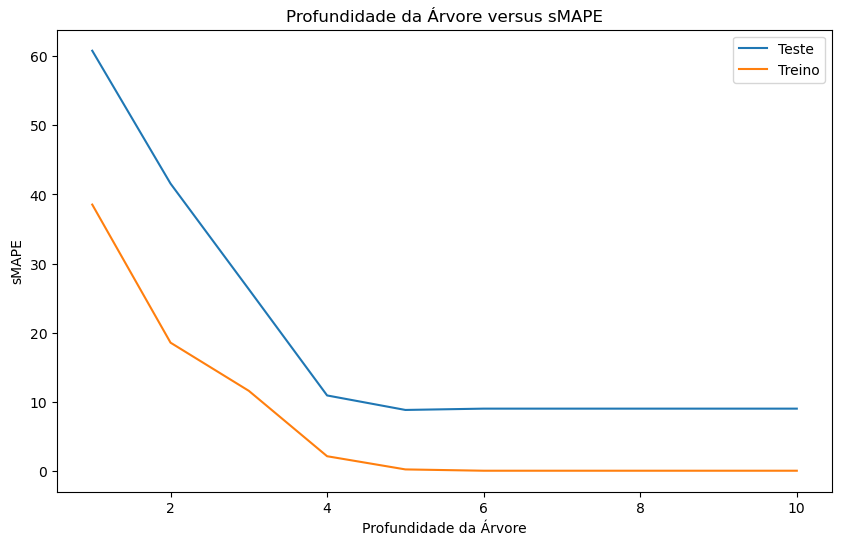

In [8]:
# Profundidades de árvore a serem testadas
depths = range(1, 11)  
# Lista para armazenar os valores do smape 
smape_scores_train = [] 
smape_scores_test = [] 
# Criando o modelo de árvore de regressão 
for depth in depths:
    regressor = DecisionTreeRegressor(max_depth=depth)
    regressor.fit(X_train, y_train)  
  
    y_train_pred = regressor.predict(X_train)
    y_pred_dt = regressor.predict(X_test)  
    # Calculando o sMAPE  da profundidade atual
    test_smape_dt = smape(y_test, y_pred_dt)
    train_smape_dt = smape(y_train, y_train_pred)
    # Adicionarndoos valores de  sMAPE
    smape_scores_test.append(test_smape_dt)
    smape_scores_train.append(train_smape_dt)
    
# Plotando as curvas de validação
plt.figure(figsize=(10, 6))
plt.plot(depths, smape_scores_test, label='Teste')
plt.plot(depths, smape_scores_train, label='Treino')
plt.legend()
plt.xlabel('Profundidade da Árvore')
plt.ylabel('sMAPE')
plt.title('Profundidade da Árvore versus sMAPE')

**TESTANDO OUTROS CRITÉRIOS PARA AVALIAR A QUALIDADE DA DIVISÃO DA ÁRVORE DE REGRESSÃO**

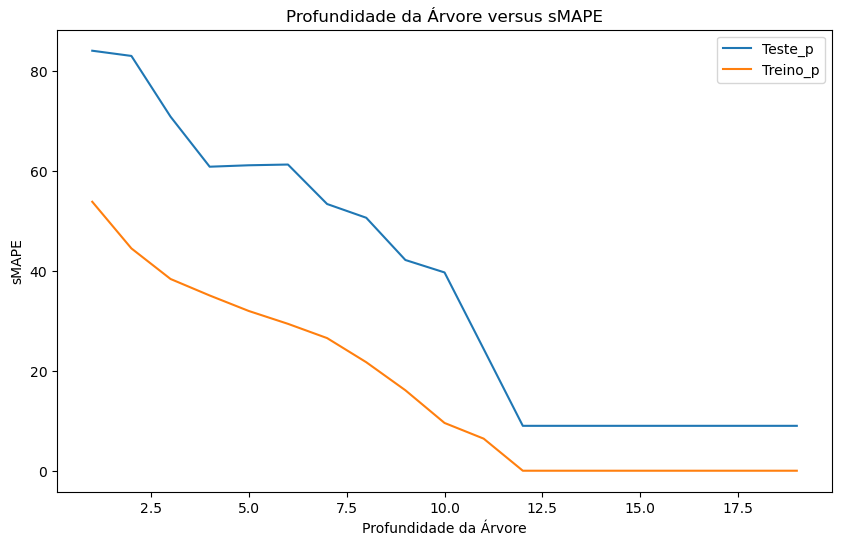

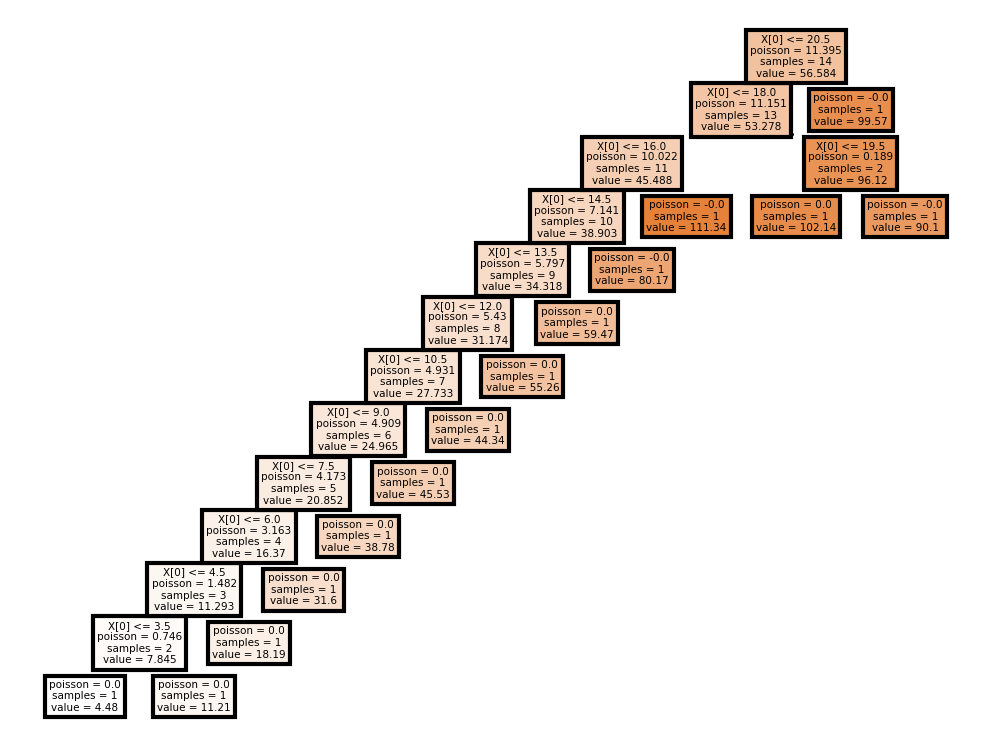

In [9]:
###########POISON###########

# Profundidades de árvore a serem testadas
depths = range(1, 20)  
# Lista para armazenar os valores do smape 
smape_scores_train_p = [] 
smape_scores_test_p = [] 
# Criando o modelo de árvore de regressão 
for depth in depths:
    regressor_p = DecisionTreeRegressor(criterion='poisson',max_depth=depth)
    regressor_p.fit(X_train, y_train)  
  
    y_train_pred_p = regressor_p.predict(X_train)
    y_pred_dt_p = regressor_p.predict(X_test)  
    # Calculando o sMAPE  da profundidade atual
    test_smape_dt_p = smape(y_test, y_pred_dt_p)
    train_smape_dt_p = smape(y_train, y_train_pred_p)
    # Adicionarndoos valores de sMAPE
    smape_scores_test_p.append(test_smape_dt_p)
    smape_scores_train_p.append(train_smape_dt_p)
    
# Plotando as curvas de validação
plt.figure(figsize=(10, 6))
plt.plot(depths, smape_scores_test_p, label='Teste_p')
plt.plot(depths, smape_scores_train_p, label='Treino_p')
plt.legend()
plt.xlabel('Profundidade da Árvore')
plt.ylabel('sMAPE')
plt.title('Profundidade da Árvore versus sMAPE')


from sklearn import tree

# Tamanho do grafico
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,3), dpi=300)

# Plotando a árvore
tree.plot_tree( regressor_p,
               filled = True);

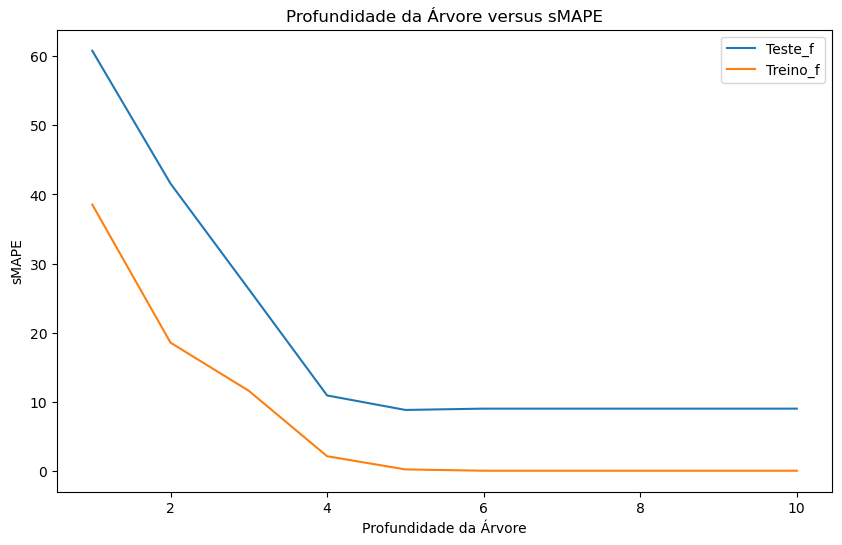

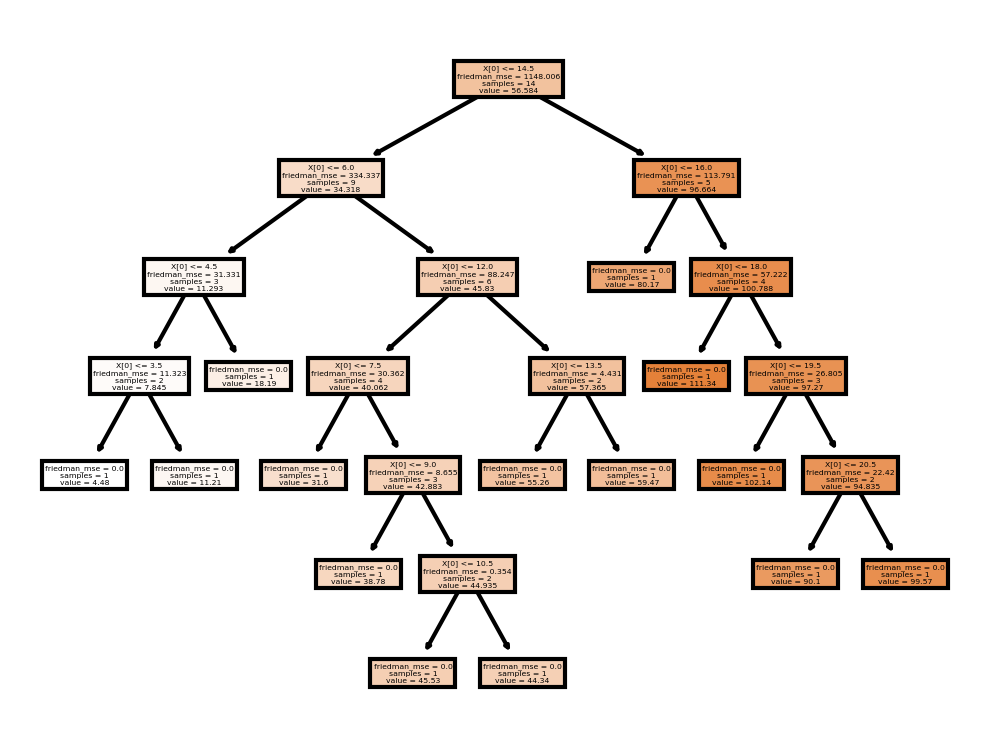

In [10]:
###########FRIEDMAN_MSE###########

# Profundidades de árvore a serem testadas
depths = range(1, 11)  
# Lista para armazenar os valores do smape 
smape_scores_train_f = [] 
smape_scores_test_f = [] 
# Criando o modelo de árvore de regressão 
for depth in depths:
    regressor_f = DecisionTreeRegressor(criterion='friedman_mse',max_depth=depth)
    regressor_f.fit(X_train, y_train)  
  
    y_train_pred_f = regressor_f.predict(X_train)
    y_pred_dt_f = regressor_f.predict(X_test)  
    # Calculando o sMAPE  da profundidade atual
    test_smape_dt_f = smape(y_test, y_pred_dt_f)
    train_smape_dt_f = smape(y_train, y_train_pred_f)
    # Adicionarndoos valores de sMAPE
    smape_scores_test_f.append(test_smape_dt_f)
    smape_scores_train_f.append(train_smape_dt_f)
    
# Plotando as curvas de validação
plt.figure(figsize=(10, 6))
plt.plot(depths, smape_scores_test_f, label='Teste_f')
plt.plot(depths, smape_scores_train_f, label='Treino_f')
plt.legend()
plt.xlabel('Profundidade da Árvore')
plt.ylabel('sMAPE')
plt.title('Profundidade da Árvore versus sMAPE')


from sklearn import tree

# Tamanho do grafico
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,3), dpi=300)

# Plotando a árvore
tree.plot_tree( regressor_f,
               filled = True);

C:\Users\Eduarda\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Eduarda\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Eduarda\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Eduarda\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Eduarda\anaconda3\lib\site-packages\sklearn\tre

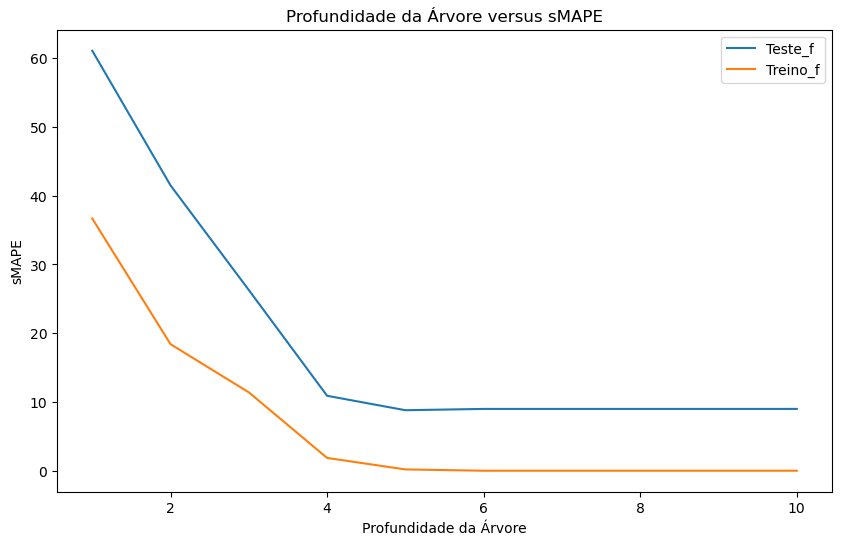

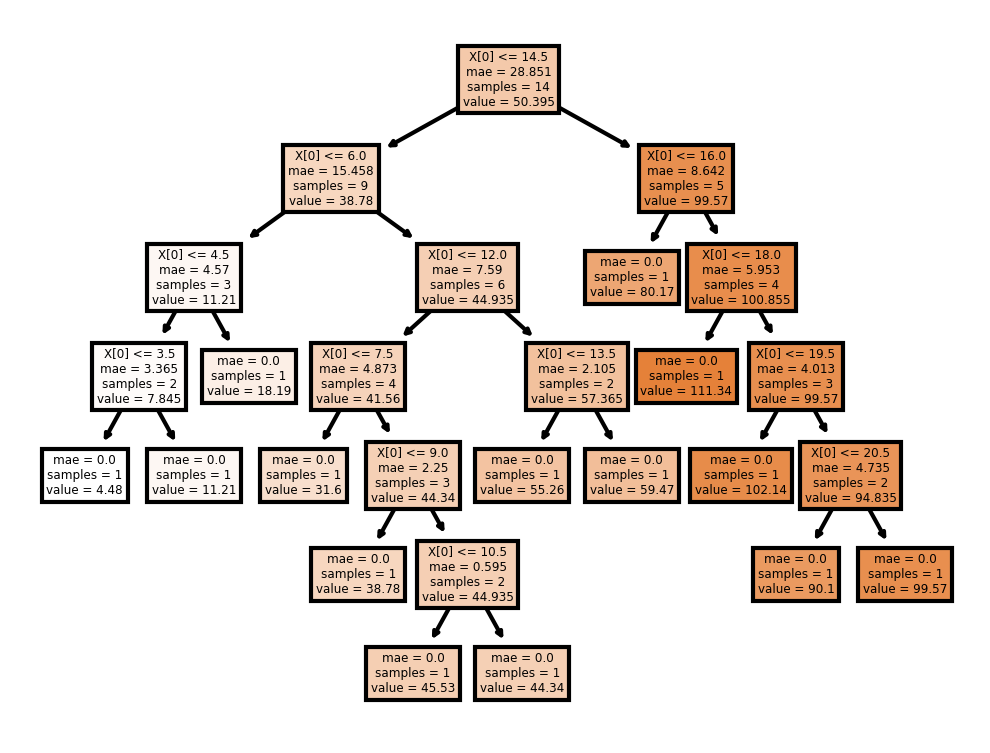

In [11]:
###########MAE###########

# Profundidades de árvore a serem testadas
depths = range(1, 11)  
# Lista para armazenar os valores do smape 
smape_scores_train_m = [] 
smape_scores_test_m = [] 
# Criando o modelo de árvore de regressão 
for depth in depths:
    regressor_m = DecisionTreeRegressor(criterion='mae',max_depth=depth)
    regressor_m.fit(X_train, y_train)  
  
    y_train_pred_m = regressor_m.predict(X_train)
    y_pred_dt_m = regressor_m.predict(X_test)  
    # Calculando o sMAPE  da profundidade atual
    test_smape_dt_m = smape(y_test, y_pred_dt_m)
    train_smape_dt_m = smape(y_train, y_train_pred_m)
    # Adicionarndoos valores de sMAPE
    smape_scores_test_m.append(test_smape_dt_m)
    smape_scores_train_m.append(train_smape_dt_m)

   
# Plotando as curvas de validação
plt.figure(figsize=(10, 6))
plt.plot(depths, smape_scores_test_m, label='Teste_f')
plt.plot(depths, smape_scores_train_m, label='Treino_f')
plt.legend()
plt.xlabel('Profundidade da Árvore')
plt.ylabel('sMAPE')
plt.title('Profundidade da Árvore versus sMAPE')

from sklearn import tree

# Tamanho do grafico
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,3), dpi=300)

# Plotando a árvore
tree.plot_tree( regressor_m,
               filled = True);

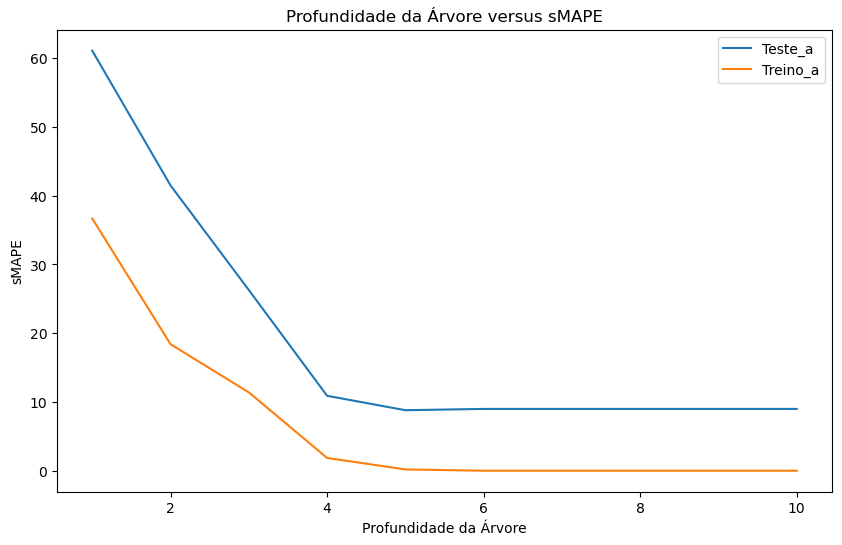

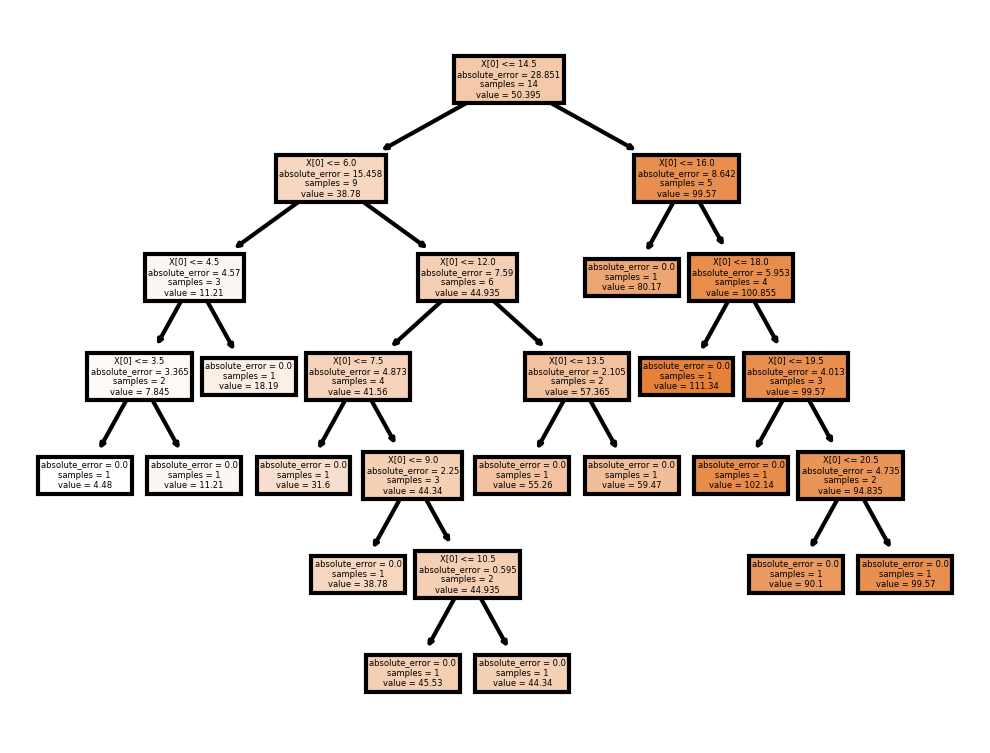

In [12]:
###########absolute_error###########

# Profundidades de árvore a serem testadas
depths = range(1, 11)  
# Lista para armazenar os valores do smape 
smape_scores_train_a = [] 
smape_scores_test_a = [] 
# Criando o modelo de árvore de regressão 
for depth in depths:
    regressor_a = DecisionTreeRegressor(criterion='absolute_error',max_depth=depth)
    regressor_a.fit(X_train, y_train)  
  
    y_train_pred_a = regressor_a.predict(X_train)
    y_pred_dt_a = regressor_a.predict(X_test)  
    # Calculando o sMAPE  da profundidade atual
    test_smape_dt_a = smape(y_test, y_pred_dt_a)
    train_smape_dt_a = smape(y_train, y_train_pred_a)
    # Adicionarndoos valores de sMAPE
    smape_scores_test_a.append(test_smape_dt_a)
    smape_scores_train_a.append(train_smape_dt_a)
    
# Plotando as curvas de validação
plt.figure(figsize=(10, 6))
plt.plot(depths, smape_scores_test_a, label='Teste_a')
plt.plot(depths, smape_scores_train_a, label='Treino_a')
plt.legend()
plt.xlabel('Profundidade da Árvore')
plt.ylabel('sMAPE')
plt.title('Profundidade da Árvore versus sMAPE')

from sklearn import tree

# Tamanho do grafico
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,3), dpi=300)

# Plotando a árvore
tree.plot_tree( regressor_a,
               filled = True);

**DECISION TREE REGRESSOR, MAX DEPTH = 5, CRITERIO= squared_error**

sMAPE (Teste): 8.798
sMAPE (Treinamento): 0.189


,Real,Previsto,Resíduo
data,,,
1,4.06,4.480,-0.420
18,105.80,111.340,-5.540
16,89.97,80.170,9.800
2,4.13,4.480,-0.350
9,37.66,38.780,-1.120
6,20.89,18.190,2.700
12,49.79,44.935,4.855


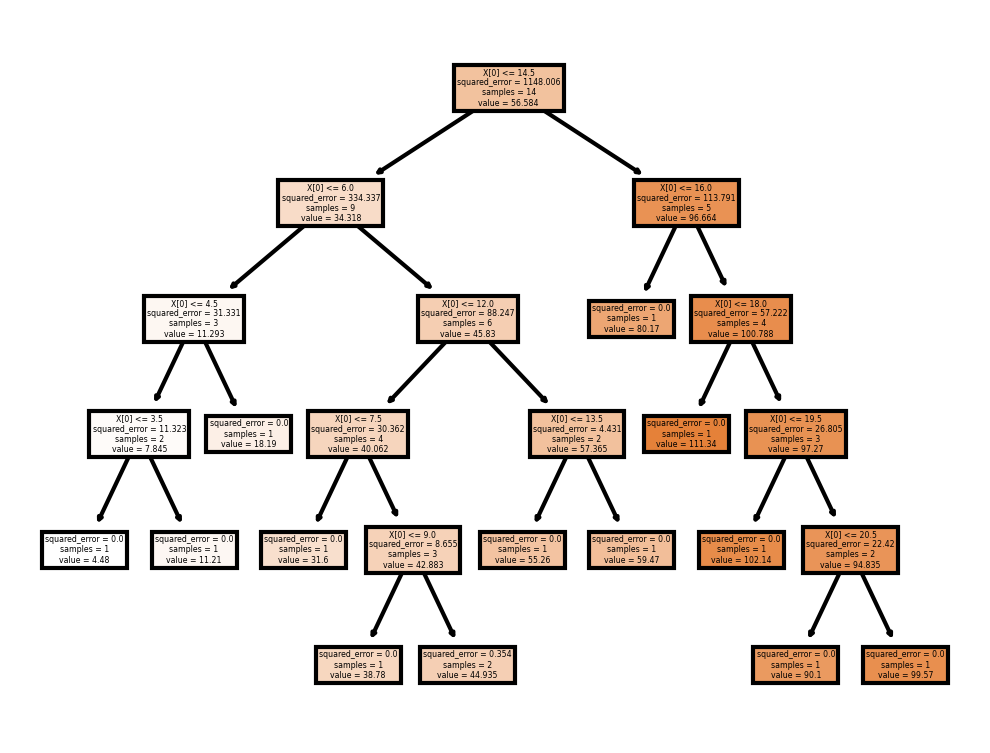

In [15]:
# Treinando novamente o modelo com profundidade de ávores = 5 

regressor_dt_4 = DecisionTreeRegressor(criterion='squared_error', max_depth=5)
regressor_dt_4.fit(X_train, y_train)
y_pred_dt_4 = regressor_dt_4.predict(X_test)

# Vizualizando a árvore 

from sklearn import tree

# Tamanho do grafico
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,3), dpi=300)

# Plotando a árvore
tree.plot_tree( regressor_dt_4,
               filled = True);

# Calculando as métricas de desempenho no conjunto de teste
sampe_dt_teste = smape(y_test, y_pred_dt_4)  
print('sMAPE (Teste): %.3f' % sampe_dt_teste)
      
# Comparando com as métricas no conjunto de treinamento 
y_train_pred_dt_4 = regressor_dt_4.predict(X_train)
smape_train_dt_4 = smape(y_train, y_train_pred_dt_4)  

print('sMAPE (Treinamento): %.3f' % smape_train_dt_4)
      
result = pd.DataFrame()
result["Real"] = y_test
result["Previsto"] = y_pred_dt_4
result["Resíduo"] = result["Real"] - result["Previsto"]
result

**POLYNOMIAL REGRESSOR**

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Transformando os dados de entrada em recursos polinomiais
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Treinando o modelo de regressão linear com polnomio grau 3
regressor_poly = LinearRegression()
regressor_poly.fit(X_train_poly, y_train)

# Realizando previsões no conjunto de teste
y_pred_poly = regressor_poly.predict(X_test_poly)

# Importando bibliotecas de métricas
from sklearn.metrics import r2_score

# Calculando as métricas de desempenho no conjunto de teste
smape_teste_poly  = smape(y_test, y_pred_poly)  # Calculando o R² no conjunto de teste
print('sMAPE (Teste): %.3f' % smape_teste_poly )

# Comparando com as métricas no conjunto de treinamento
y_train_pred_poly = regressor_poly.predict(X_train_poly)
smape_train_poly = smape(y_train, y_train_pred_poly)  # Calculando o R² no conjunto de treinamento

print('sMAPE (Treinamento): %.3f' % smape_train_poly)

result = pd.DataFrame()
result["Real"] = y_test
result["Previsto"] = y_pred_poly
result["residuo"] = result["Real"] - result["Previsto"]
result

sMAPE (Teste): 21.716
sMAPE (Treinamento): 16.049


,Real,Previsto,residuo
data,,,
1,4.06,7.162820,-3.102820
18,105.80,93.667022,12.132978
16,89.97,84.058475,5.911525
2,4.13,7.494690,-3.364690
9,37.66,37.850403,-0.190403
6,20.89,20.189116,0.700884
12,49.79,58.423348,-8.633348


In [17]:
#FAZENDO PREDICOES PARA O PROXIMO ANO COM O DT

# Converter a lista em uma matriz NumPy
X = np.array([22])

# Reshape para o formato correto
X = X.reshape(-1, 1)

y_new_dt = regressor_dt_4.predict(X)
y_new_dt

array([99.57])

In [18]:
#FAZENDO PREVDICOES PARA O PROXIMO ANO COM O POLY
# Convertendo a lista em uma matriz NumPy
X = np.array([22])

# Reshape para o formato correto
X = X.reshape(-1, 1)

# Transformando os dados de entrada
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

# Fazendo a previsão com o modelo treinado
y_new_poly = regressor_poly.predict(X_poly)
y_new_poly

array([101.04490361])